In [15]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [ ]:

import librosa

def extract_mfcc(file_path, duration=30, n_mfcc=40):
    try:
        y, sr = librosa.load(file_path, duration=duration)
    except Exception as e:
        print(f"Warning: failed to load {file_path}: {e}")
        return None
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)

In [ ]:
import numpy as np

import pandas as pd

import os
import librosa

import librosa.display

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set plotting style
sns.set_theme(style="whitegrid")

In [ ]:
dataset_path = "dataset/"

features = []
labels = []

# Loop through genre folders
for genre in os.listdir(dataset_path):
    genre_path = os.path.join(dataset_path, genre)
    
    #looping through the genre folders
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.lower().endswith(".wav"):
                file_path = os.path.join(genre_path, file)
                
                # Extract MFCCs using helper (returns None on failure)
                mfccs = extract_mfcc(file_path, duration=30, n_mfcc=40)
                if mfccs is None:
                    continue
                
                features.append(mfccs)
                labels.append(genre)

# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)
print("Shape of features:", X.shape)
print("Number of labels:", len(y))

C:\Users\64pul\AppData\Local\Temp\ipykernel_14080\2785423622.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=duration)
c:\Users\64pul\AppData\Local\Programs\Python\Python313\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Shape of features: (999, 40)
Number of labels: 999
Shape of features: (999, 40)
Number of labels: 999


In [ ]:

# Encode labels to numbers
lablenc = LabelEncoder()
y_encoded = lablenc.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)
# i did 80-20
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 799
Testing samples: 200


Classification Report:
              precision    recall  f1-score   support

       blues       0.88      0.71      0.79        21
   classical       0.67      1.00      0.80        12
     country       0.70      0.58      0.64        24
       disco       0.56      0.64      0.60        22
      hiphop       0.44      0.47      0.45        15
        jazz       0.95      0.70      0.81        27
       metal       0.71      0.94      0.81        18
         pop       0.70      0.84      0.76        19
      reggae       0.59      0.59      0.59        22
        rock       0.47      0.35      0.40        20

    accuracy                           0.67       200
   macro avg       0.67      0.68      0.66       200
weighted avg       0.68      0.67      0.67       200



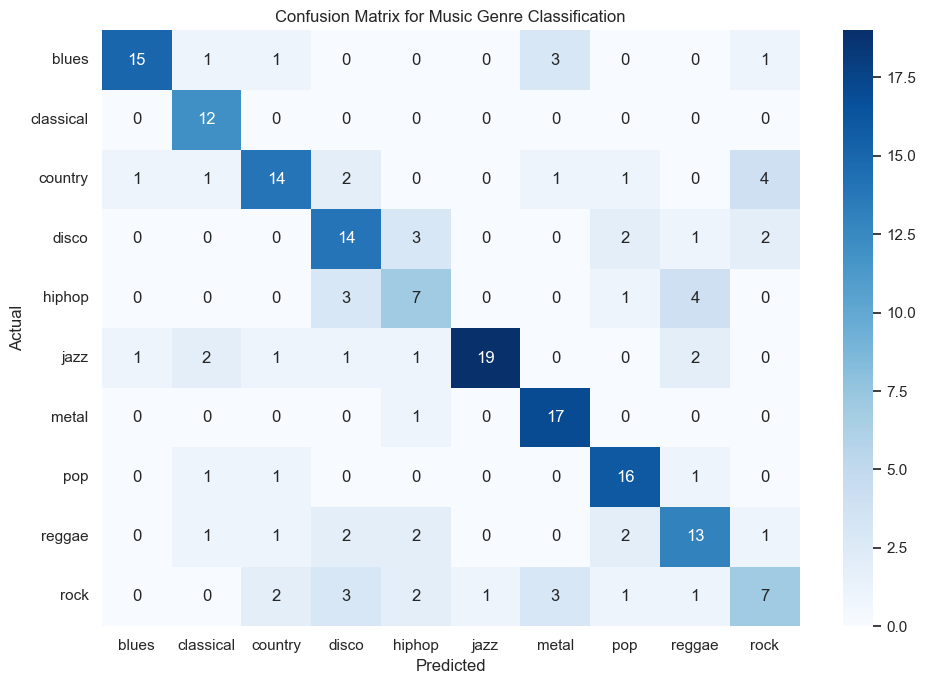

In [ ]:
#INITIALISING THE MODEL
clf = RandomForestClassifier(n_estimators=100, random_state=42)

#FITTING THE MODEL
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=lablenc.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#HOW MUCH HIT AND MISS


# Plot confusion matrix
#you know what a confusion matrix is

plt.figure(figsize=(10, 7)) #SPECIFYING THE SIZE OF THE FIGURE


sns.heatmap(cm, annot=True, fmt="d", 
            xticklabels=lablenc.classes_, 
            yticklabels=lablenc.classes_, 
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Music Genre Classification")
plt.tight_layout()

plt.show()


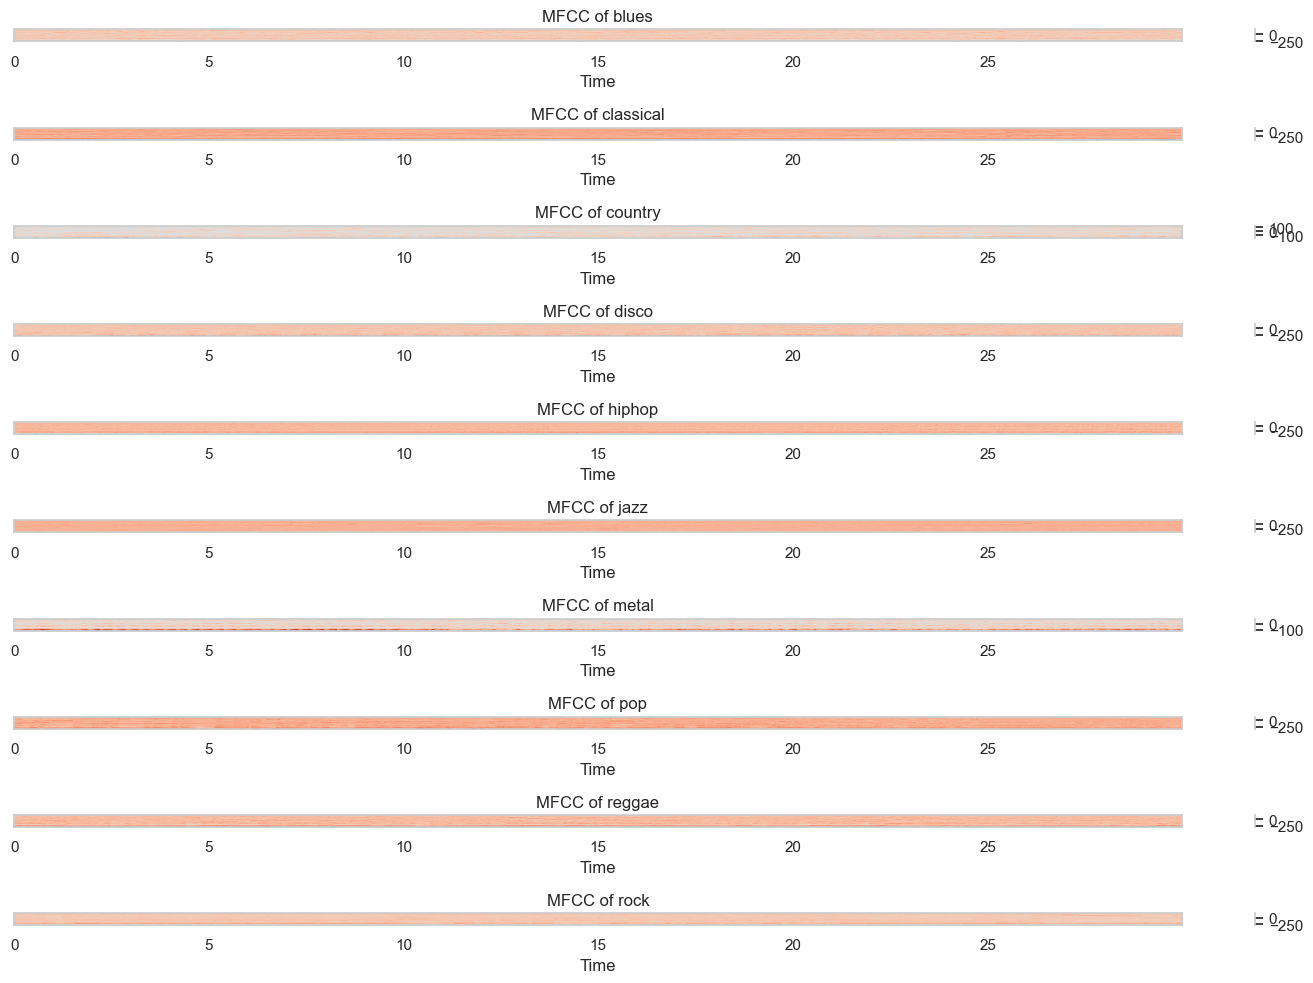

In [ ]:
#MFCC VISULATION
#GOING FANCY ARE WE? LOL

sample_indices = []
genres_unique = np.unique(y)

for genre in genres_unique:
    # Find the first index of this genre type

    idx = np.where(y == genre)[0][0]

    sample_indices.append(idx)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    genre_folder = y[idx]

    genre_path = os.path.join(dataset_path, genre_folder)

    first_file = os.listdir(genre_path)[0]
    
    file_path = os.path.join(genre_path, first_file)
    
    y_audio, sr = librosa.load(file_path, duration=30)
    mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=40)
    
    plt.subplot(len(genres_unique), 1, i + 1)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(f'MFCC of {genre_folder}')

plt.tight_layout()
plt.show()

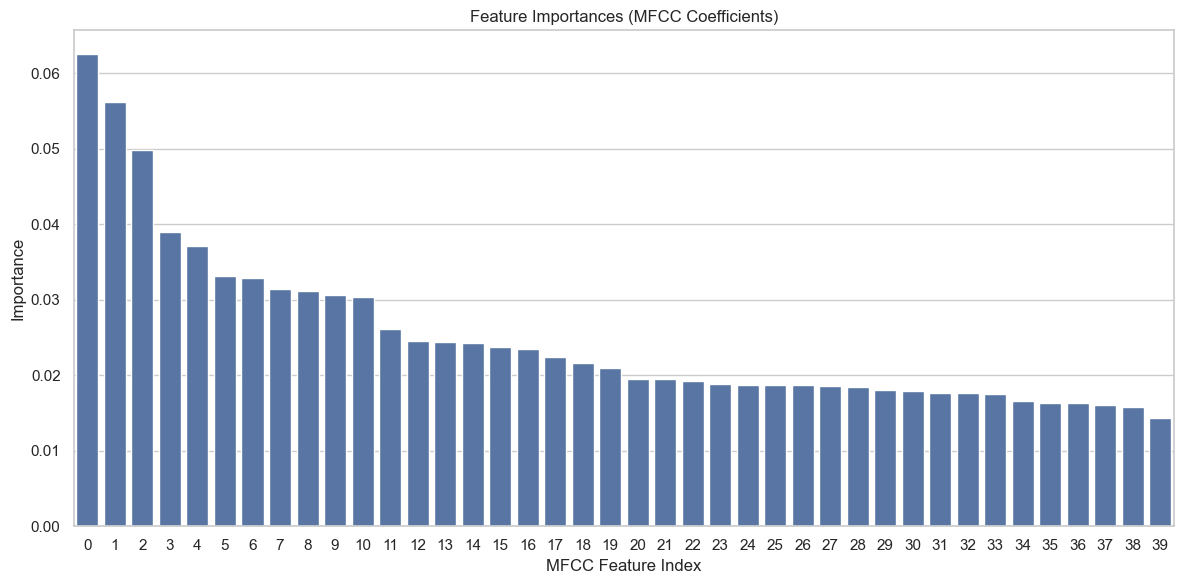

In [33]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (MFCC Coefficients)")
sns.barplot(x=np.arange(len(importances)), y=importances[indices])
plt.xlabel("MFCC Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

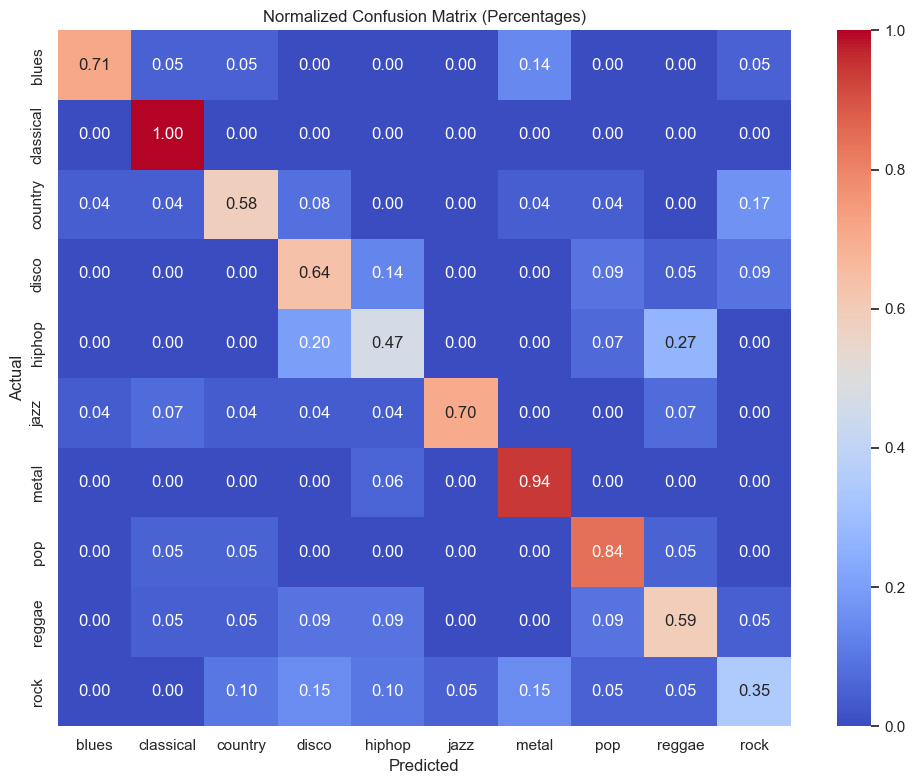

In [34]:
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", 
            xticklabels=lablenc.classes_, 
            yticklabels=lablenc.classes_, 
            cmap="coolwarm")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix (Percentages)")
plt.tight_layout()
plt.show()